In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
# Load the Dataset
df=pd.read_csv('Fraud.csv')

In [3]:
# Show the full data
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0,0


In [4]:
#Exploring transcation type
df['type'].value_counts()

CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: type, dtype: int64

In [5]:
a=list(df['type'].value_counts().keys())
b=list(df['type'].value_counts())

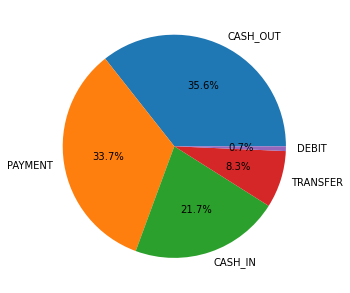

In [6]:
# Represent the data in Pie-chart
plt.figure(figsize=(5,8))
plt.pie(b,labels=a,autopct='%0.1f%%')
plt.show()


In [7]:
# Check the dataset has any null value or not
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
#Check correlation b/w the features of data with the is fraud column
# checking correlation
correlation =df.corr()
correlation['isFraud'].sort_values(ascending=False)

isFraud           1.000000
amount            0.128862
step              0.045030
oldbalanceOrg     0.003829
newbalanceDest   -0.000495
oldbalanceDest   -0.007552
newbalanceOrig   -0.009438
isFlaggedFraud         NaN
Name: isFraud, dtype: float64

In [9]:
# Exploring transaction type
df['type'].value_counts()

CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: type, dtype: int64

In [10]:
# Using self define no's with Replace method
df["type"]=df["type"].replace({"CASH_OUT":1,"PAYMENT":2,"CASH_IN":3,"TRANSFER":4,"DEBIT":5})
df["isFraud"]=df["isFraud"].replace({0:"No Fraud",1:"Fraud"})
print(df.head())

   step  type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1     2   9839.64  C1231006815       170136.0       160296.36   
1     1     2   1864.28  C1666544295        21249.0        19384.72   
2     1     4    181.00  C1305486145          181.0            0.00   
3     1     1    181.00   C840083671          181.0            0.00   
4     1     2  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest   isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0  No Fraud               0  
1  M2044282225             0.0             0.0  No Fraud               0  
2   C553264065             0.0             0.0     Fraud               0  
3    C38997010         21182.0             0.0     Fraud               0  
4  M1230701703             0.0             0.0  No Fraud               0  


In [41]:
#Spliting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=42)

In [42]:
# initiate array
x=np.array(df[['type','amount','oldbalanceOrg','newbalanceOrig']])
y=np.array(df[['isFraud']])

In [43]:
# import Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [44]:
#classifier=DecisionTreeClassifier(criterion='gini')                                       # by default criterion='gini')
                      #OR 
classifier=DecisionTreeClassifier(criterion='entropy')                                  # by Default entropy     


In [45]:
# Check the Model invoked
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [46]:
# Check the model Score
classifier.score(x_test,y_test)

0.9994373342997196

In [47]:
# Prediction 
#Check the Features=[type,amount,oldbalanceOrg,newbalanceOrg]
classifier.predict([[4,9000,9000,0.0]])

array(['Fraud'], dtype=object)